In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import cross_validation
import tensorflow as tf
import tensorflow.contrib.learn as skflow
%matplotlib inline
sns.set()

/Users/vince/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# EDA

In [2]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(8378, 195)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


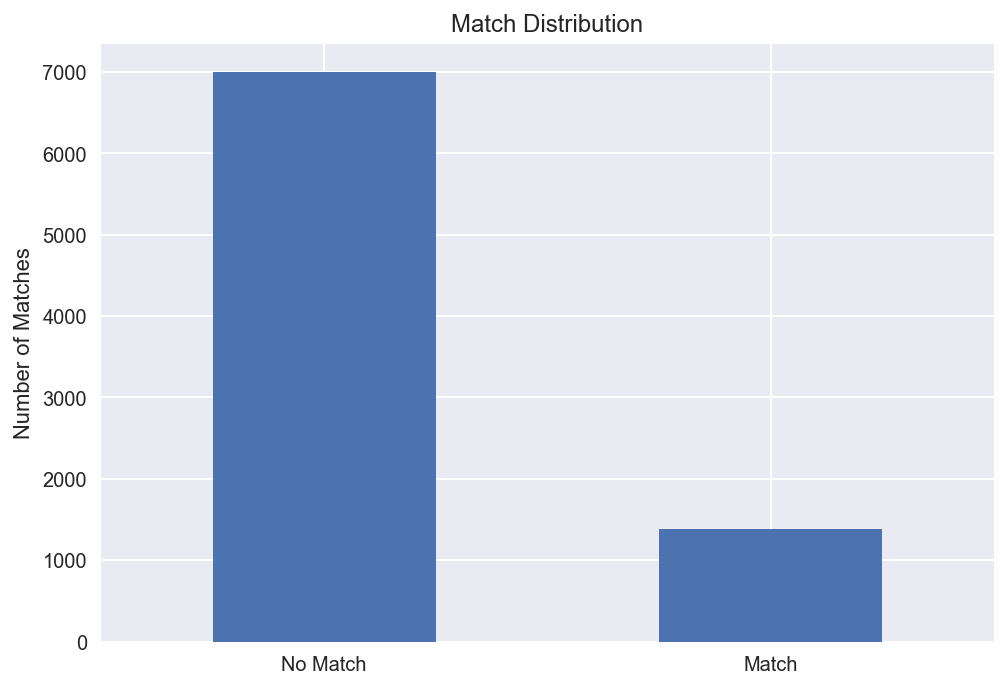

In [6]:
plt.figure()
df['match'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('No Match','Match'),rotation='horizontal')
plt.ylabel('Number of Matches')
plt.title('Match Distribution')
plt.show()

~ 5:1 Class size ratio  (6889:1380)

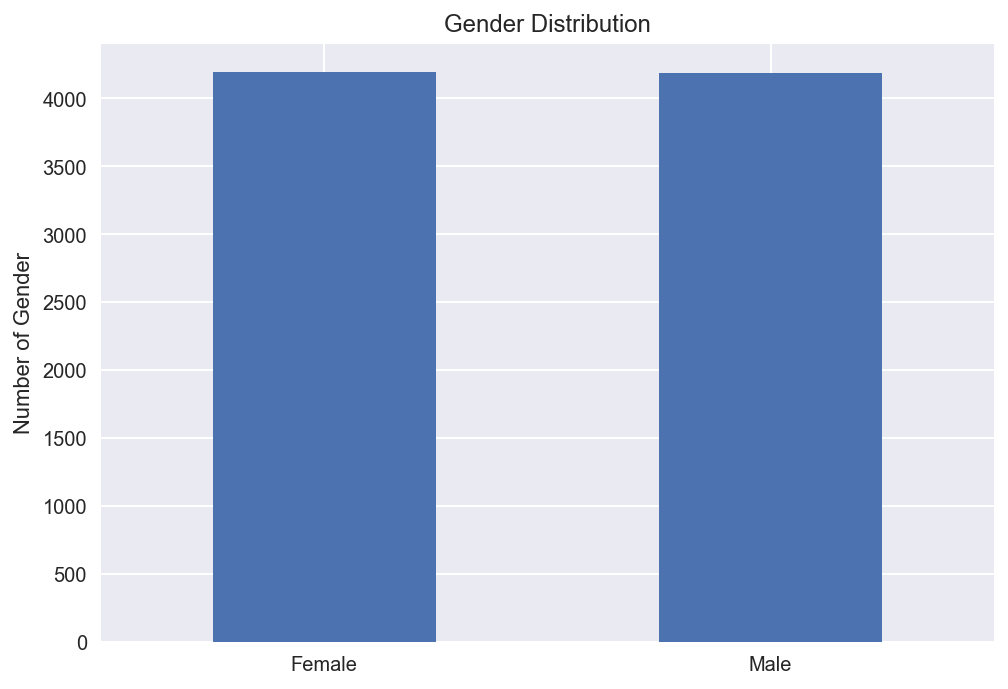

In [7]:
plt.figure()
df['gender'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('Female','Male'),rotation='horizontal')
plt.ylabel('Number of Gender')
plt.title('Gender Distribution')
plt.show()

In [8]:
df.corr().match.sort_values(ascending=False).head(10)


match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.305853
like      0.305723
fun_o     0.277700
fun       0.277545
shar_o    0.270840
shar      0.270679
attr_o    0.260837
Name: match, dtype: float64

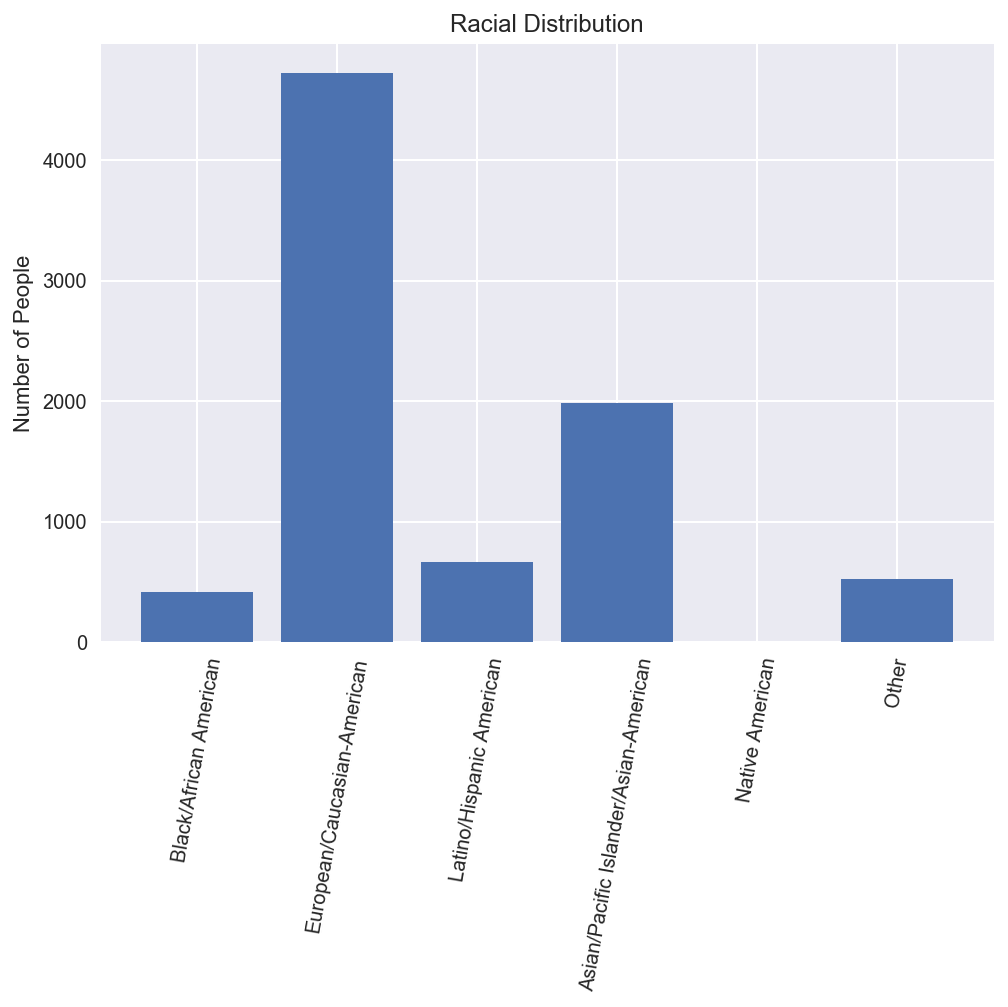

In [9]:
## Had to hard code this in otherwise could not get the ideal graph

plt.figure()
plt.bar(np.arange(1,7), [ 420, 4727, 664, 1982,0, 522])
plt.xticks(np.arange(1,7),('Black/African American',
'European/Caucasian-American',
'Latino/Hispanic American',
'Asian/Pacific Islander/Asian-American',
'Native American',
'Other'),rotation=80)

plt.ylabel('Number of People')
plt.title('Racial Distribution')
plt.show()


There are more European/Caucasian than all the other races combined

In [10]:
df['from'].value_counts().head(10)

New York         522
New Jersey       365
California       301
China            139
Italy            132
New York City    130
Boston           123
Texas            120
NYC              109
India            107
Name: from, dtype: int64

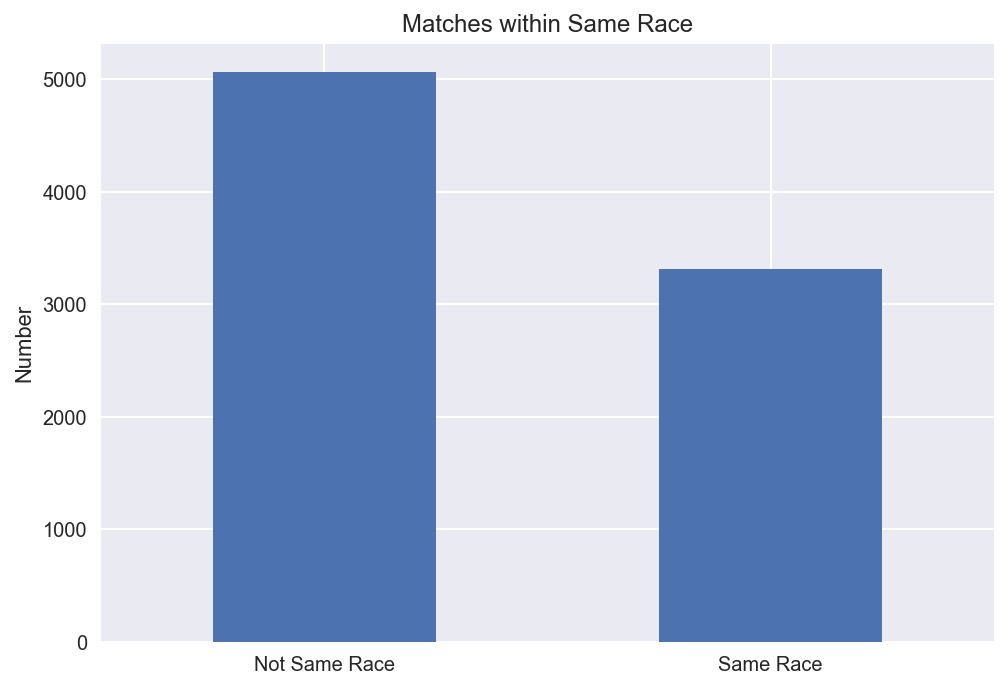

In [11]:
plt.figure()
df['samerace'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('Not Same Race','Same Race'),rotation='horizontal')
plt.ylabel('Number')
plt.title('Matches within Same Race')
plt.show()

In [12]:
df.go_out.value_counts()

2.0    2990
1.0    2610
3.0    1949
4.0     450
5.0     164
6.0      99
7.0      37
Name: go_out, dtype: int64

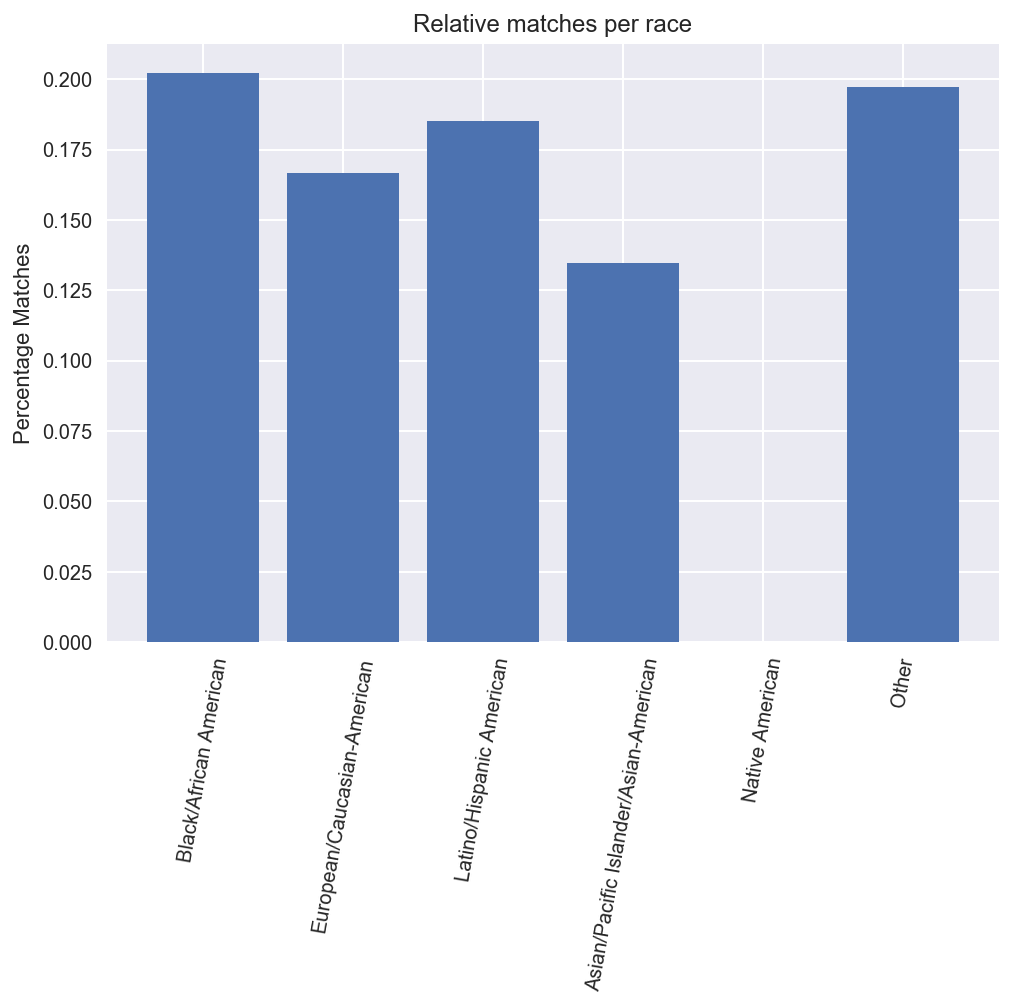

In [13]:
race_list = [1,2,3,4,6]
result = {}

for race in race_list:
    result[race] = len(df[(df['match'] ==1) & (df['race'] == race)]) / len(df[df['race'] == race])

plt.figure()
plt.bar(list(result.keys()),list(result.values()))
plt.xticks(np.arange(1,7),('Black/African American',
'European/Caucasian-American',
'Latino/Hispanic American',
'Asian/Pacific Islander/Asian-American',
'Native American',
'Other'),rotation=80)
plt.title('Relative matches per race')
plt.ylabel('Percentage Matches')
plt.show()

In [14]:
gender_list = [0,1]
result = {}

for race in gender_list:
    result[race] = len(df[(df['match'] ==1) & (df['gender'] == race)]) / len(df[df['gender'] == race])

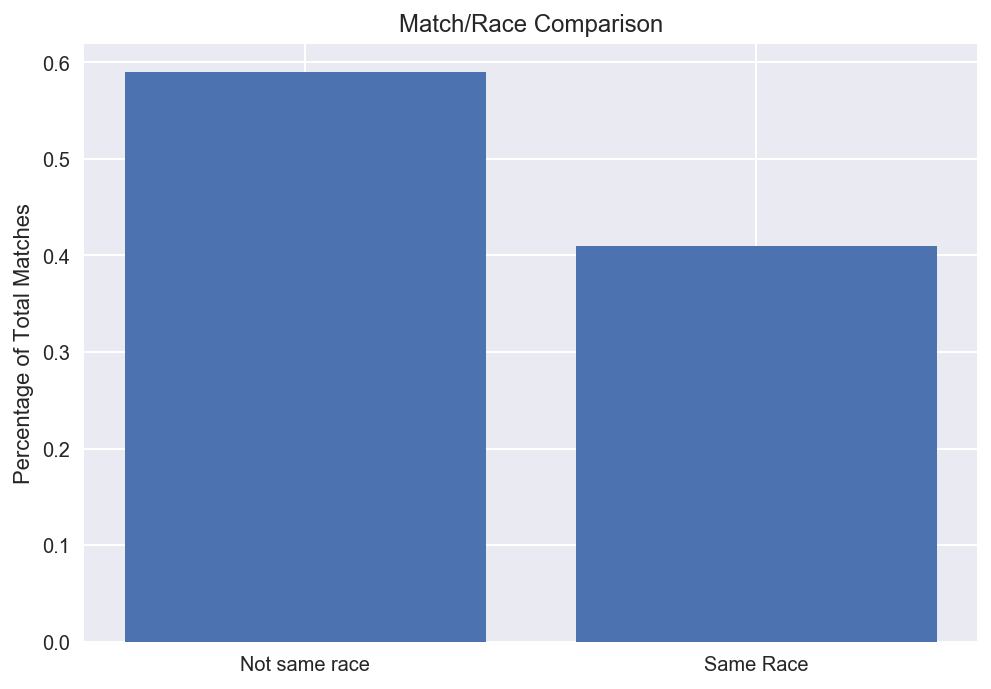

In [15]:
samerace_list = [0,1]
samerace_dict = {}
for samerace in samerace_list:
    
    samerace_dict[samerace] = len(df[(df['match'] ==1) & (df['samerace'] == samerace)] ) / len(df[df['match'] == 1])
    
plt.figure()
plt.bar(list(samerace_dict.keys()),list(samerace_dict.values()))
plt.xticks(np.arange(2),('Not same race', 'Same Race'))
plt.title('Match/Race Comparison')
plt.ylabel('Percentage of Total Matches')
plt.show()

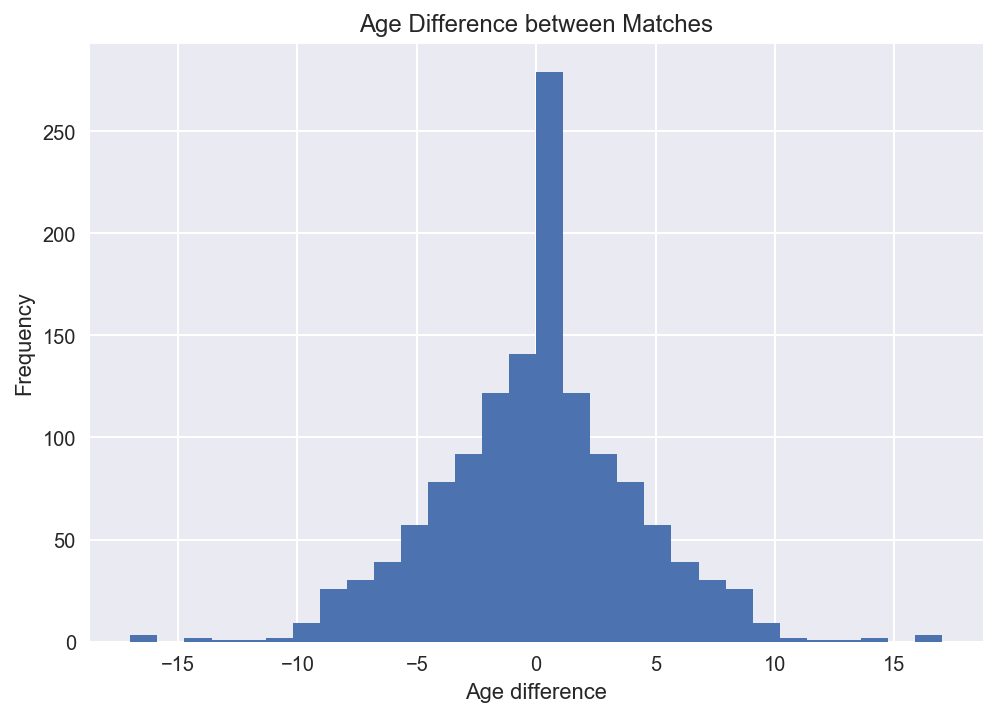

In [16]:
matches = df[df['match'] ==1]
age_diff = matches.age - matches.age_o
plt.figure()
age_diff.hist(bins=30)
plt.title('Age Difference between Matches')
plt.xlabel('Age difference')
plt.ylabel('Frequency')

In [17]:
# matches = df[df['match'] ==1]
for col in matches.columns:
    print(col)

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [18]:
gender_list = [0,1]
result = {}
# df[(df['match'] ==1) & (df['race'] == 6)] 

for race in gender_list:
    result[race] = len(df[(df['match'] ==1) & (df['gender'] == race)]) / len(df[df['gender'] == race])

In [19]:
len(df[(df['match'] ==1) & (df['satis_2'] >= 1)]) / len(df['match'] ==1)

0.14896156600620672

In [20]:
df['satis_2'].value_counts()

6.0     1886
7.0     1383
5.0     1272
8.0      894
4.0      722
3.0      520
2.0      412
9.0      239
1.0       73
10.0      62
Name: satis_2, dtype: int64

In [21]:
career_list = np.arange(1,18)
career_dict = {}
for career in career_list:
    career_dict[career] = len(df[(df['match'] ==1) & (df['career_c'] == career)]) / len(df['career_c'] == career)

In [22]:
career_dict

{1: 0.01599427070899976,
 2: 0.0429696825017904,
 3: 0.00644545237526856,
 4: 0.0083552160420148,
 5: 0.004296968250179041,
 6: 0.013726426354738601,
 7: 0.046550489376939605,
 8: 0.0005968011458582001,
 9: 0.00942945810455956,
 10: 0.005729291000238721,
 11: 0.0041776080210074,
 12: 0.00011936022917164001,
 13: 0.0007161613750298401,
 14: 0.00035808068751492004,
 15: 0.0015516829792313201,
 16: 0.0009548818333731201,
 17: 0.00011936022917164001}

Academic/Research have highest match rates and next up are lawyers

Features to engineer later: 
- impute median incomes by career


# Preprocessing

In [23]:
df.zipcode = df.zipcode.astype('category')
df.goal = df.goal.astype('category')
df.date = df.date.astype('category')
df.go_out = df.go_out.astype('category')
df.career_c = df.career_c.astype('category')
df.field_cd = df.field_cd.astype('category')
df.length = df.length.astype('category')


__Seperate target from features__

In [24]:
df_X, y = df.drop(['match'], axis=1), df['match']

In [25]:
# Drop columns with more than 22% missing values
# 6600 is ~22% missing values
df_X = df_X.dropna(axis=1,thresh=6600)
df_X.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,4,1,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,3,2,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,10,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,5,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,7,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [26]:
df_X.shape

(8378, 104)

In [27]:
df_X = df_X.fillna(df.median())

In [28]:
np.sum(df_X.isnull().sum())

1295

__Df still has NaN values__

In [29]:
null_col = df_X.isnull().sum() > 0
null_col[null_col != 0]

field      True
from       True
zipcode    True
career     True
dtype: bool

__The columns field, from, zipcode, and career have NaN values, I will ignore them for now since there is over 100 features. Can feature engineer later if model metrics need to be improved __

In [30]:
df_X[['field','from','zipcode','career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [31]:
df_X.drop(['field','from','zipcode','career'],axis=1,inplace=True)

# Field and career are converted to categories in field_cd 

In [32]:
np.sum(df_X.isnull().sum())

0

__No more NaN Values remaining__

# Normalize data

In [33]:
X = StandardScaler().fit_transform(df_X)
X

array([[-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       ..., 
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734, -0.17486595,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526]])

# PCA

In [34]:
pca = PCA().fit(X)

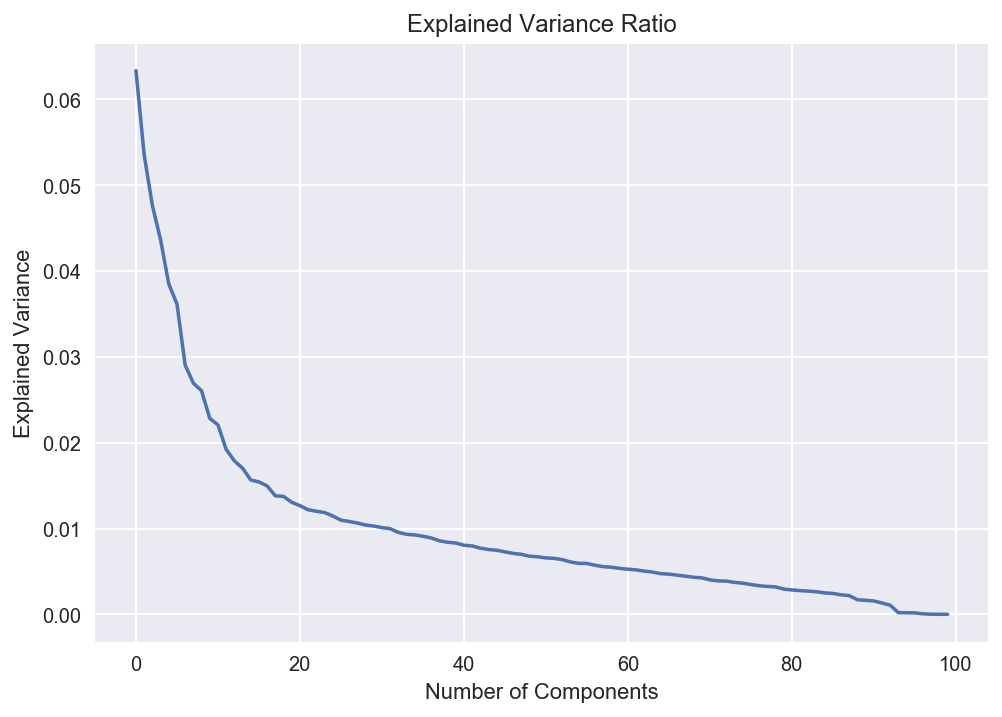

In [35]:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

__It appears that most of variability is in the first 65 dimensions__

In [36]:
pca_reduced = PCA(n_components=65).fit_transform(X)
pca_reduced.shape

(8378, 65)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(pca_reduced,y,random_state=23)

# Models

__Random Forest__

In [38]:
rand_forest = RandomForestClassifier(n_estimators=300,oob_score=True)
rf_fit = rand_forest.fit(X_train,y_train)
rf_predict = rf_fit.predict(X_test)

In [39]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,rf_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,rf_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,rf_predict)))

Accuracy Score: 0.88
Precision Score: 0.98
Recall Score: 0.20


__Prediction accuracy/precision is high, without tweaking any hyperparameters, however recall is very low due to a high number of False Negatives__

In [40]:
confusion_matrix(y_test,rf_predict)

array([[1782,    1],
       [ 249,   63]])

__Sklearn confusion matrix format:__  
__([TN,FP ],__   
__[FN,TP]) __

__Support Vector Classifier__

In [41]:
svc = SVC(class_weight='balanced')
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)

“balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data 

In [42]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,svc_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,svc_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,svc_predict)))

Accuracy Score: 0.99
Precision Score: 0.98
Recall Score: 0.96


In [43]:
confusion_matrix(y_test,svc_predict)

array([[1776,    7],
       [  13,  299]])

__Prediction accuracy and recall is even higher than in random forest, precision is slightly lower __

__Tensor Flow__

In [44]:
x_ = skflow.infer_real_valued_columns_from_input(X_train)
y_ = skflow.DNNClassifier(feature_columns=x_,hidden_units=[55]) 

y_.fit(X_train, y_train, steps=300)
tf_predict = list(y_.predict(X_test, as_iterable=True))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x130a6dda0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving int

/Users/vince/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/7m/yd6z_yx96nbfst_3z89gdpwh0000gn/T/tmpimp8432v/model.ckpt.
INFO:tensorflow:loss = 0.716611, step = 1
INFO:tensorflow:global_step/sec: 9.92944
INFO:tensorflow:loss = 0.119762, step = 101 (10.074 sec)
INFO:tensorflow:global_step/sec: 9.84375
INFO:tensorflow:loss = 0.0522406, step = 201 (10.157 sec)
INFO:tensorflow:Saving checkpoints for 300 into /var/folders/7m/yd6z_yx96nbfst_3z89gdpwh0000gn/T/tmpimp8432v/model.ckpt.
INFO:tensorflow:Loss for final step: 0.030575.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters f

In [45]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,tf_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,tf_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,tf_predict)))

Accuracy Score: 0.99
Precision Score: 0.99
Recall Score: 0.95


In [46]:
metrics.confusion_matrix(y_test,tf_predict)

array([[1779,    4],
       [  16,  296]])

__Gradient Boosting__

In [47]:
grad_boost = GradientBoostingClassifier(n_estimators=300,max_depth=8,verbose=1)
gb_fit = grad_boost.fit(X_train,y_train)
gb_predict = gb_fit.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.7907           50.63s
         2           0.7038           52.08s
         3           0.6300           52.96s
         4           0.5747           53.55s
         5           0.5266           53.87s
         6           0.4820           54.18s
         7           0.4444           54.43s
         8           0.4092           55.30s
         9           0.3813           55.07s
        10           0.3538           54.96s
        20           0.1847           52.17s
        30           0.1074           50.08s
        40           0.0655           48.49s
        50           0.0411           47.04s
        60           0.0260           45.27s
        70           0.0167           43.49s
        80           0.0110           41.97s
        90           0.0072           40.15s
       100           0.0048           38.29s
       200           0.0004           15.25s
       300           0.0004            0.00s


In [48]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,gb_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,gb_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,gb_predict)))

Accuracy Score: 0.93
Precision Score: 0.95
Recall Score: 0.53


In [49]:
confusion_matrix(y_test,gb_predict) 

array([[1775,    8],
       [ 146,  166]])